In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'],)

In [8]:
df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [9]:
df=pd.get_dummies(df,['Geography','Gender'],drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
print(X.shape)
print(y.shape)
print(x_train.shape)

print(y_train.shape)

(10000, 11)
(10000,)
(8000, 11)
(8000,)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =scaler.fit_transform(x_test)

In [13]:
x_train_scaled[0]

array([-0.23082038, -0.94449979, -0.70174202,  0.58817274,  0.80225696,
       -1.55337352,  0.97725852,  0.42739449,  1.71490137, -0.57273139,
        0.91509065])

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [15]:
model =Sequential()

In [16]:
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [18]:

from keras.api._v2.keras import metrics
model.compile(loss=tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
#     reduction=losses_utils.ReductionV2.AUTO,
    name='binary_crossentropy'
),optimizer='adam',metrics=['accuracy'])

In [19]:
history=model.fit(x_train_scaled,y_train,epochs=50,validation_split=.2)

Epoch 1/50
200/200 [==============================] - 5s 5ms/step - loss: 0.5655 - accuracy: 0.7972 - val_loss: 0.5293 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5100 - accuracy: 0.7972 - val_loss: 0.4937 - val_accuracy: 0.7975
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4831 - accuracy: 0.7972 - val_loss: 0.4761 - val_accuracy: 0.7975
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4690 - accuracy: 0.7972 - val_loss: 0.4661 - val_accuracy: 0.7975
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4597 - accuracy: 0.7972 - val_loss: 0.4589 - val_accuracy: 0.7975
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4528 - accuracy: 0.7972 - val_loss: 0.4532 - val_accuracy: 0.7975
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7972 - val_loss: 0.4485 - val_accuracy: 0.7975
Epoch 

In [20]:
model.layers[0].get_weights()

[array([[ 1.52128786e-01,  2.94217259e-01, -7.42288604e-02],
        [-3.91717887e+00, -1.03426015e+00, -2.17234626e-01],
        [-5.16231097e-02,  1.33972302e-01,  1.38379604e-01],
        [ 4.50509861e-02, -4.57867444e-01, -4.41860557e-01],
        [-2.12203269e-03,  5.74177727e-02,  1.23387806e-01],
        [-1.49331167e-01,  4.21970934e-01,  2.75234822e-02],
        [-5.00844181e-01,  8.39010775e-01,  1.73717582e+00],
        [ 2.02323109e-01, -3.02356660e-01, -1.46778271e-01],
        [-1.99649453e-01, -9.71692979e-01, -7.16428816e-01],
        [-1.05862647e-01,  9.72167924e-02, -1.07824862e-01],
        [ 2.89906412e-02,  8.44981134e-01,  5.61459184e-01]], dtype=float32),
 array([0.64898527, 0.05092451, 0.3892393 ], dtype=float32)]

In [21]:
model.layers[1].get_weights()

[array([[-1.8249133],
        [-0.8446672],
        [-1.47194  ]], dtype=float32),
 array([0.67144966], dtype=float32)]

In [22]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [23]:
y_pred=np.where(y_log >0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score =(y_test,y_pred)

In [25]:
history.history

{'loss': [0.5655386447906494,
  0.5099766254425049,
  0.4831206500530243,
  0.4689978063106537,
  0.4597284197807312,
  0.45275238156318665,
  0.4472201466560364,
  0.44274693727493286,
  0.43907079100608826,
  0.4360430836677551,
  0.4335744082927704,
  0.4314730167388916,
  0.42980891466140747,
  0.42836615443229675,
  0.427217572927475,
  0.42624300718307495,
  0.4253779649734497,
  0.42464134097099304,
  0.423921138048172,
  0.4232737421989441,
  0.4226571321487427,
  0.4220314919948578,
  0.4214611053466797,
  0.4208759069442749,
  0.42023712396621704,
  0.4196411371231079,
  0.41903916001319885,
  0.41845571994781494,
  0.417862206697464,
  0.41729506850242615,
  0.41673991084098816,
  0.41619986295700073,
  0.41563746333122253,
  0.4151493012905121,
  0.4146082401275635,
  0.41413265466690063,
  0.4136834740638733,
  0.41328665614128113,
  0.41286391019821167,
  0.4124794006347656,
  0.4121088683605194,
  0.41175857186317444,
  0.41137513518333435,
  0.4110689163208008,
  0.4108

(0.0, 1.0)

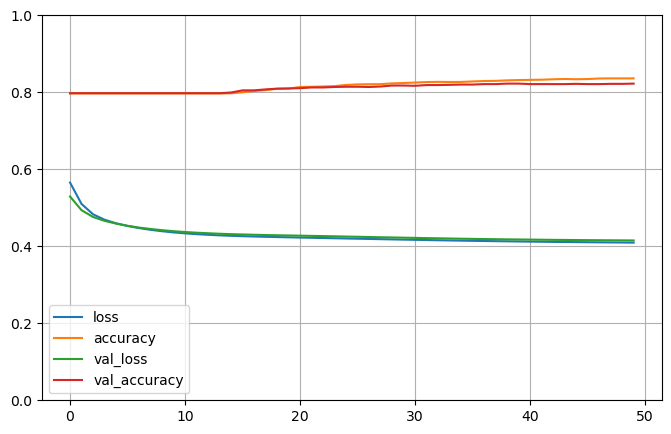

In [26]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
     

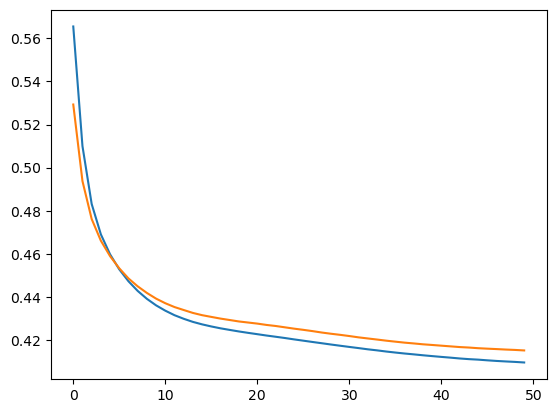

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

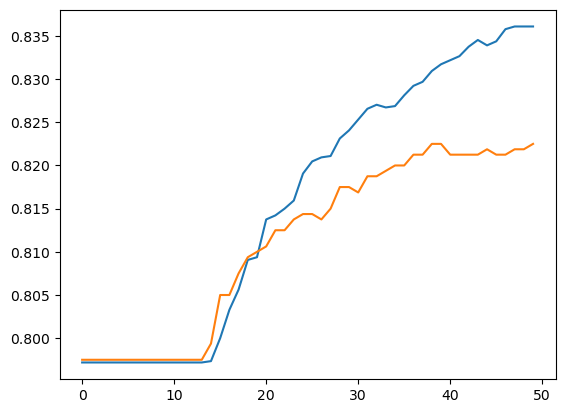

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])